<a href="https://colab.research.google.com/github/Zeitgeisth/ArtificialIntelligence/blob/main/Project2_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import networkx as nx

In [152]:
G = nx.DiGraph()   #unlike in Project 1, the edges in the network are directed.
G.add_edges_from([('s', 'v', {'flow': 0}), ('s', 'v',{'capacity': 10}),
 ('s', 'w',{'flow': 0}), ('s', 'w',{'capacity': 8}),
  ('s','u',{'flow': 0}), ('s','u',{'capacity': 11}),
   ('v','w', {'flow': 0}), ('v','w',{'capacity': 9}),
    ('v','e', {'flow': 0}), ('v','e',{'capacity': 3}),              # modified from last version: edge (1,4) replaced by edge (1,5)
     ('u','w', {'flow': 0}), ('u','w',{'capacity': 8}),
      ('u','z', {'flow': 0}), ('u','z',{'capacity': 12}),
       ('w','e', {'flow': 0}), ('w','e',{'capacity': 8}),
        ('w','z',{'flow': 0}), ('w','z',{'capacity': 9}),
         ('z','e', {'flow': 0}), ('z','e',{'capacity': 9})])

In [ ]:
G[0][1]['flow'] = 6

In [ ]:
print(G[0][1]['flow'])

2


{('s', 'v'): 10, ('s', 'w'): 8, ('s', 'u'): 11, ('v', 'w'): 9, ('v', 'e'): 3, ('w', 'e'): 8, ('w', 'z'): 9, ('u', 'w'): 8, ('u', 'z'): 12, ('z', 'e'): 9}


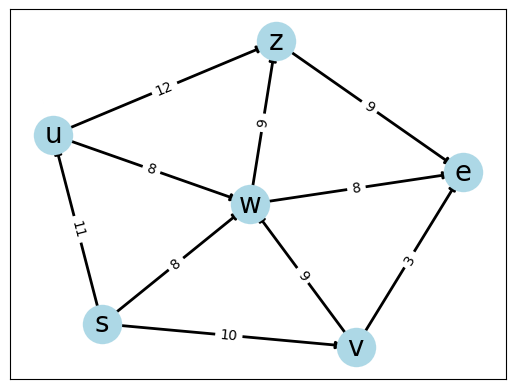

{('s', 'v'): 3, ('s', 'w'): 7, ('s', 'u'): 6, ('v', 'w'): 3, ('v', 'e'): 1, ('w', 'e'): 3, ('w', 'z'): 6, ('u', 'w'): 6, ('u', 'z'): 0, ('z', 'e'): 6}


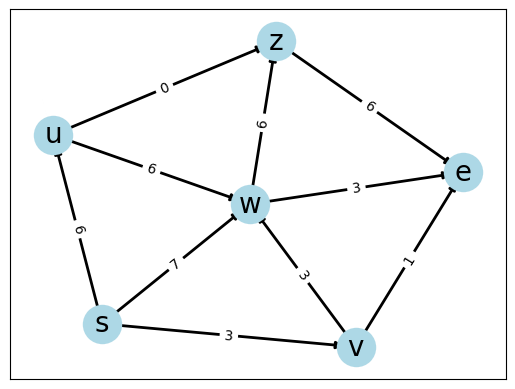

In [150]:
import matplotlib.pyplot as plt # routine to plot the example graph

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', linewidths=0.05)
nx.draw_networkx_edges(G, pos, edgelist=links, width=2)

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

edge_labels = nx.get_edge_attributes(G, 'capacity')
print(edge_labels)

nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()





import matplotlib.pyplot as plt # routine to plot the example graph

links = [(u, v) for (u, v, d) in G.edges(data=True)]
pos = nx.nx_pydot.graphviz_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=800, node_color='lightblue', linewidths=0.05)
nx.draw_networkx_edges(G, pos, edgelist=links, width=2)

nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

edge_labels = nx.get_edge_attributes(G, 'flow')
print(edge_labels)

nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()




In [112]:
def getAllPaths(G, sink, source):
  paths = nx.all_simple_edge_paths(G, source=source, target=sink, cutoff=9)
  p = []

  for path in paths:
    p.append(path)

  return p


In [113]:
def getFlow(G, sink):
  currentFlow = 0
  edgesFlow = G.in_edges(sink)

  for i, j in edgesFlow:
    currentFlow = currentFlow + G[i][j]['flow']
  return currentFlow

In [114]:
import math

def getMinCapacity(G, successor):
  minimum = math.inf
  for i, j in successor:
    capacity = G[i][j]['capacity']
    if(capacity < minimum):
      minimum = capacity
  return int(minimum)


In [5]:
print(getFlow(G, 5))


9


In [115]:
flowEdges = []

In [143]:
def adjustFlow(Graph, successor, source, sink, flowValue, flag):
  paths = getAllPaths(Graph, sink, source)
  if (len(flowEdges) == 0):
    for i, j in successor:
      Graph[i][j]['flow'] = flowValue
  else:
    for edge in successor:
      for fEdge in flowEdges:
        if edge in fEdge:
          for i, j in edge:
            Graph[i][j] = 0
          if(flag):
            flowEdges.pop(fEdge)

    for i, j in successor:
      Graph[i][j]['flow'] = flowValue

    if(flag):
      flowEdges.append(successor)

  return Graph


# **Heuristic Function**

In [144]:
def changeInFlow(G, source, sink, current, successor):
  Graph = G
  currentFlow = getFlow(Graph, sink)
  minCapacityofSuccessor = getMinCapacity(Graph, successor)

  ##print(currentFlow)

  flowValue = max(0, np.random.randint(minCapacityofSuccessor)) + 1

  ##print(flowValue)

  Graph = adjustFlow(Graph, successor, source, sink, flowValue, False)

  successorFlow = getFlow(Graph, sink)

  ##print(successorFlow)

  changeInFlow = successorFlow - currentFlow

  ##print(changeInFlow)

  return changeInFlow, flowValue


# **Verify Successor**

In [145]:
import math
import random

def verifySuccessor(G, current, successor, flowValue, changeInFlow, T, source, sink):
  nextPath = None

  if(changeInFlow > 0):
    nextPath = successor
    G = adjustFlow(G, successor, source, sink, flowValue, True)
  else:
    probToAccept = math.exp(changeInFlow / T)
    randValue = random.random()
    if(probToAccept > randValue):
      nextPath = successor
      G = adjustFlow(G, successor, source, sink, flowValue, True)
    else:
      nextPath = current

  return nextPath



# **Driver Algorithm**

In [151]:
import numpy as np

def simulated_annealing(G, source, sink, initialTemperature, coolingSchedule):
  all_paths = getAllPaths(G, sink, source)
  T = initialTemperature
  alpha = coolingSchedule
  current = None
  loop = 0
  while T != 0:
    successor = None

    successorIndex = np.random.randint(len(all_paths)-1)
    successor = all_paths[successorIndex]
    ##print(successor)
    while successor == current:
      successorIndex = np.random.randint(len(all_paths)-1)
      ##print(successor)
      successor = all_paths[successorIndex]

    changeFlow, flowValue = changeInFlow(G, source, sink, current, successor)

    current = verifySuccessor(G, current, successor, flowValue, changeFlow, T, source, sink)

    T = T * (1 - alpha)

    loop = loop + 1

  print(loop)



In [153]:
simulated_annealing(G, 's', 'e', 100, 0.5)

1082
